In [3]:
# import necessary libraries

import cv2
import numpy as np
from matplotlib import pyplot as plt

In [4]:
img = cv2.imread("day0_scar.png", 0)
equ = cv2.equalizeHist(img)
print(img)
print(equ)

[[132 128 128 ... 170 187 176]
 [135 141 144 ... 162 182 180]
 [147 156 158 ... 165 173 179]
 ...
 [175 175 175 ... 180 182 182]
 [173 173 173 ... 182 182 182]
 [170 168 167 ... 183 180 178]]
[[  9   6   6 ... 136 251 203]
 [ 10  14  16 ...  53 241 232]
 [ 18  30  35 ...  75 173 224]
 ...
 [196 196 196 ... 232 241 241]
 [173 173 173 ... 241 241 241]
 [136 110 101 ... 244 232 219]]


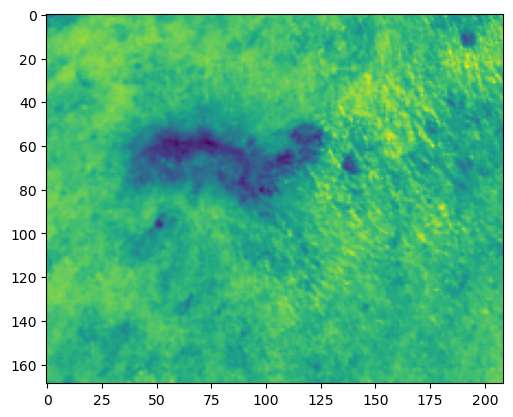

In [5]:
plt.imshow(img)

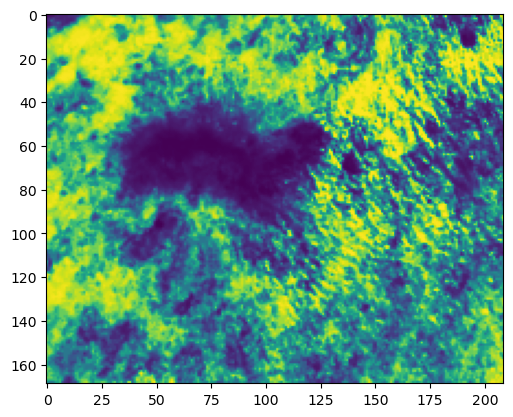

In [8]:
plt.imshow(equ)

In [9]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(img)

# save the image
cv2.imwrite('day0_clahe.png', clahe_img)

True

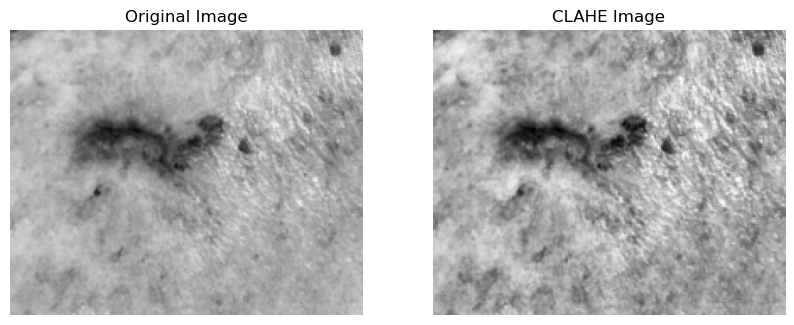

In [10]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(clahe_img, cmap='gray')
plt.title('CLAHE Image')
plt.axis('off')

plt.show()

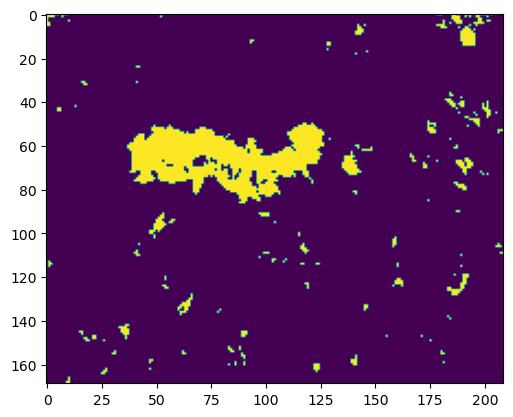

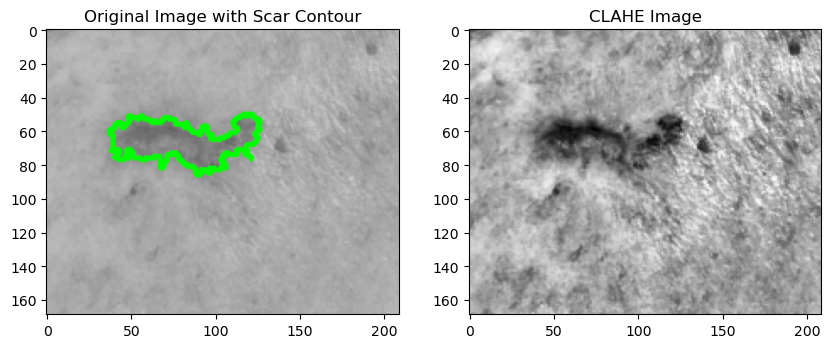

Estimated length of scar (day 0): 90 pixels


In [11]:
# convert CLAHE img to binary using thresholding
_, binary_img = cv2.threshold(clahe_img, 140, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary_img)

# find contours
contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# assume largest contour = scar
scar_contour = max(contours, key=cv2.contourArea)

# draw contour on image for visualization
img_with_contour = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img_with_contour, [scar_contour], -1, (0, 255, 0), 2)
x, y, w, h = cv2.boundingRect(scar_contour)
scar_length = max(w, h)

plt.figure(figsize=(10, 5))

# original image with contour
plt.subplot(1, 2, 1)
plt.imshow(img_with_contour, cmap='gray')
plt.title('Original Image with Scar Contour')

# clahe image
plt.subplot(1, 2, 2)
plt.imshow(clahe_img, cmap='gray')
plt.title('CLAHE Image')

plt.show()

print(f"Estimated length of scar (day 0): {scar_length} pixels")

# Day 2

In [12]:
img2 = cv2.imread("day2_scar.png", 0)
clahe_img2 = clahe.apply(img2)

# save the image
cv2.imwrite('day2_clahe.png', clahe_img2)

True

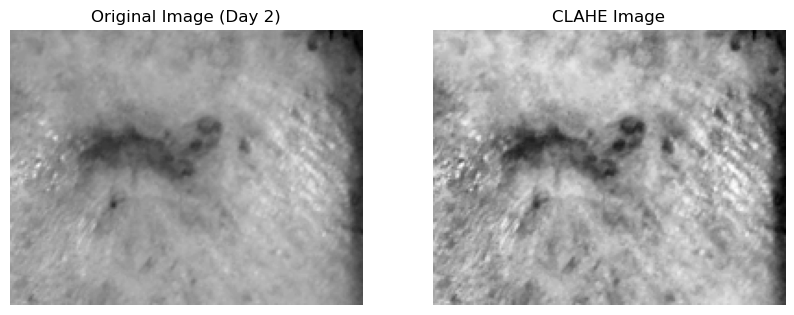

In [13]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img2, cmap='gray')
plt.title('Original Image (Day 2)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(clahe_img2, cmap='gray')
plt.title('CLAHE Image')
plt.axis('off')

plt.show()

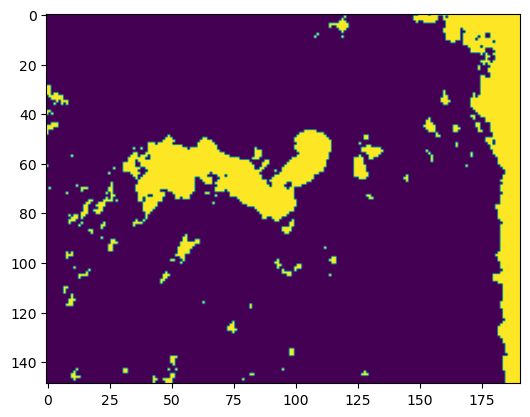

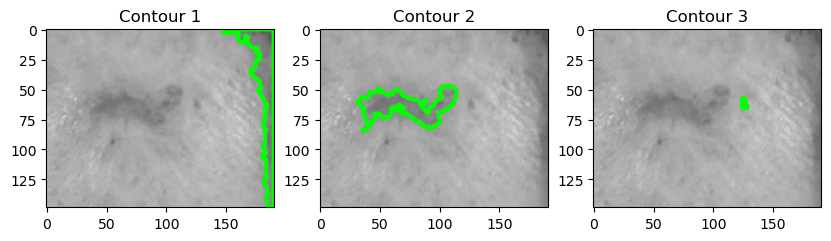

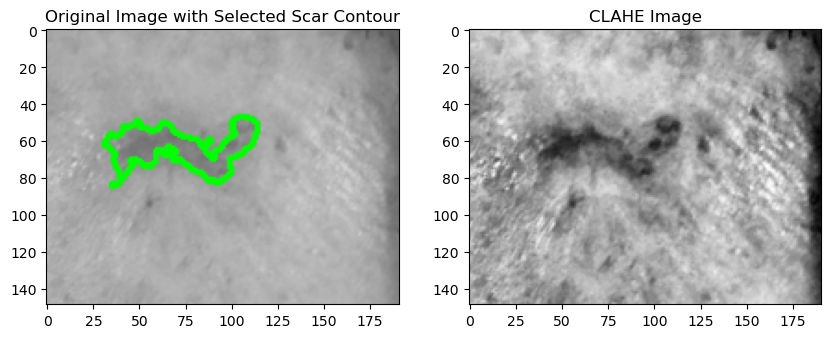

Estimated length of scar (day 2): 84 pixels


In [ ]:
# convert CLAHE img to binary using thresholding
_, binary_img2 = cv2.threshold(clahe_img2, 140, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary_img2)

# find contours
contours2, _ = cv2.findContours(binary_img2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# sort contours by area, take top 3
top_contours = sorted(contours2, key=cv2.contourArea, reverse=True)[:3]

# draw top 3 contours on original image for visualization
plt.figure(figsize=(10, 5))
img_with_contours = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
for i, contour in enumerate(top_contours):
    # create a copy of original image
    img_with_contour = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(img_with_contour, [contour], -1, (0, 255, 0), 2)
    x, y, w, h = cv2.boundingRect(contour)
    
    plt.subplot(1, 3, i+1)
    plt.imshow(img_with_contour, cmap='gray')
    plt.title(f'Contour {i+1}')
    
plt.show()
selected_contour_index = int(input("Select the contour that best represents the scar (1, 2, or 3): ")) - 1

selected_contour = top_contours[selected_contour_index]

img_with_selected_contour = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img_with_selected_contour, [selected_contour], -1, (0, 255, 0), 2)

x, y, w, h = cv2.boundingRect(selected_contour)
scar_length = max(w, h)

# display the original image with the selected contour
plt.figure(figsize=(10, 5))

# original image with contour
plt.subplot(1, 2, 1)
plt.imshow(img_with_selected_contour, cmap='gray')
plt.title('Original Image with Selected Scar Contour')

# clahe image
plt.subplot(1, 2, 2)
plt.imshow(clahe_img2, cmap='gray')
plt.title('CLAHE Image')

plt.show()

print(f"Estimated length of scar (day 2): {scar_length} pixels")